In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lets_plot import *
import statsmodels.api as sm
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
sns.set()

In [96]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [97]:
# Required to use lets_plot
import numpy as np
from lets_plot import *
LetsPlot.setup_html()        

np.random.seed(12)
data = dict(
    cond=np.repeat(['A','B'], 200),
    rating=np.concatenate((np.random.normal(0, 1, 200), np.random.normal(1, 1.5, 200)))
)

ggplot(data, aes(x='rating', fill='cond')) + ggsize(500, 250) \
+ geom_density(color='dark_green', alpha=.7) + scale_fill_brewer(type='seq') \
+ theme(axis_line_y='blank')

In [291]:
# Loading datasets 
path1 = "data/gearbox_data.csv"
path2 = "data/gearbox_data_D1_D2.csv"
path3 = "data/new data.csv"
path4 = "data/new_data_D1_D2.csv"
path5 = "data/both_gearbox_data_D1_D2.csv"

dataset = path4

dataframe = pd.read_csv(dataset, encoding="latin_1")
df = dataframe

In [292]:
# Display first 3 rows
df.head(3)

,part,class,polygons,vertices,x,y,z,com_x,com_y,com_z,...,91.1,92.1,93.1,94.1,95.1,96.1,97.1,98.1,99.1,100.1
0,body1,casing,11412,5658,0.290,-0.6330,3.500000e-01,0.306800,-0.632741,-2.067226e-01,...,0.003181,0.001591,0.001237,0.001944,0.000884,0.001414,0.000707,0.002651,0.002474,0.001767
1,body1.001,shaft,7066,3535,-0.216,0.3019,-6.110000e-15,-0.216000,-0.475139,1.188810e-04,...,0.000000,0.009618,0.005941,0.001980,0.003395,0.000000,0.000000,0.024328,0.003960,0.004526
2,body1.002,bearing ring,1368,684,-0.216,-0.0271,-6.250000e-15,-0.215998,-0.027100,1.860000e-10,...,0.219298,0.216374,0.252924,0.250000,0.147661,0.020468,0.023392,0.035088,0.043860,0.019006


In [293]:
# Bar chart showing how many objects of each class there are
ggplot() + geom_bar(aes(x="class"), data=df)

In [294]:
# Total number of parts
print(len(df["class"]))

188


In [295]:
# Path1 and 4 should have 237 columns, extra column because of class 2 column
# Path3 should have 236 columns
len(df.columns)

236

In [296]:
# Categorising features of the dataset 
if len(df.columns)>35:
    parameters = (df.columns.values[3:236])
else:
    parameters = (df.columns.values[1:33])

In [297]:
# Categorising features of the dataset (cont)
class_names = df['class'].unique()
classes = df['class']
features_names = parameters
features = df[parameters]

In [298]:
# Displaying distinct class names in the dataset
# Path and Path 1 should have screws
print(class_names)

['casing' 'shaft' 'bearing ring' 'gear' 'ball bearing' 'roller bearing']


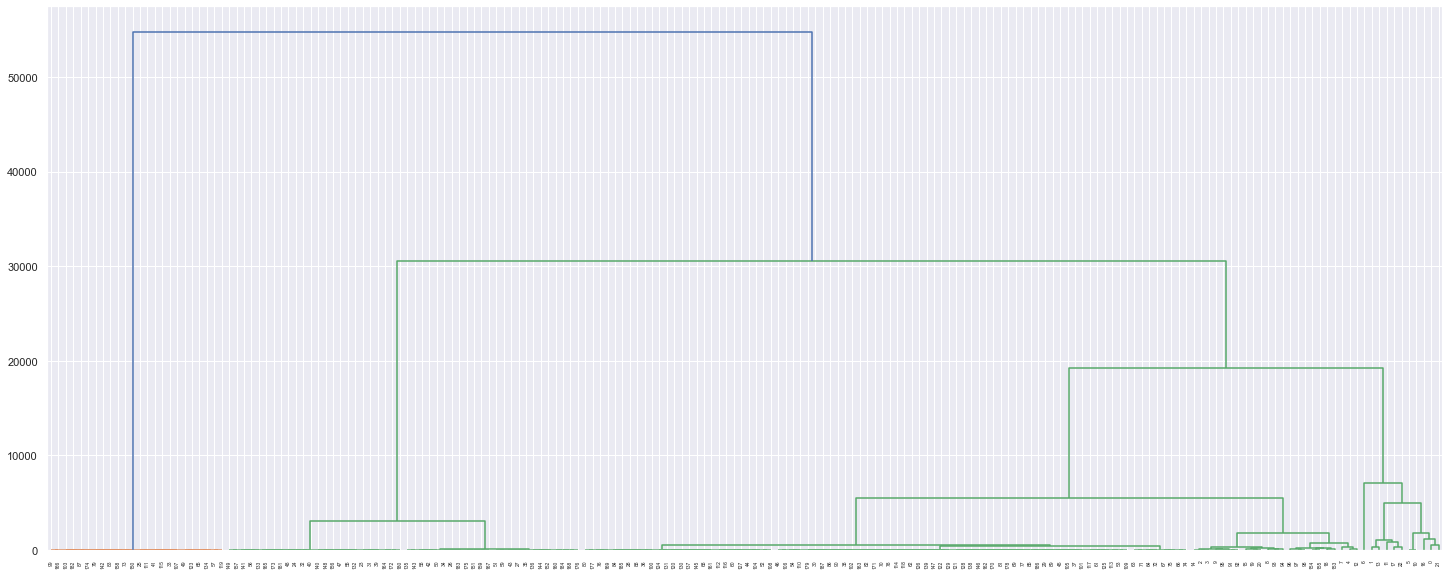

In [299]:
# Hierarchical clustering for 7 clusters

# create dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram_7_clusters = sch.dendrogram(sch.linkage(features, method='ward'))
plt.show()

# create clusters
hc_7_clusters = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
saved_hc_7_clusters = hc_7_clusters.fit_predict(features)


In [300]:
# Clustering outcomes for parts
outcome_7_clusters = saved_hc_7_clusters
outcome_7_clusters

array([2, 6, 1, 1, 1, 2, 4, 1, 1, 1, 2, 6, 1, 6, 1, 1, 2, 6, 1, 1, 1, 2,
       6, 0, 0, 3, 0, 0, 5, 5, 5, 0, 0, 3, 0, 0, 5, 5, 5, 0, 0, 3, 0, 0,
       5, 5, 5, 0, 0, 3, 0, 0, 5, 5, 5, 0, 0, 3, 0, 0, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3,
       5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5,
       5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 3, 0, 0, 5, 5, 5, 0, 0, 3, 0, 0, 5, 5, 5, 0, 0, 3, 0, 0, 1,
       1, 1, 0, 0, 3, 0, 0, 5, 5, 5, 0, 0, 3, 0, 0, 5, 5, 5, 0, 0, 3, 0,
       0, 5, 5, 5, 0, 0, 3, 0, 0, 5, 5, 5])

In [301]:
# Plotting clustering outcomes
data_with_7_clusters = df.copy()
data_with_7_clusters['Clusters'] = outcome_7_clusters

In [302]:
# Making new dataframe to visualise clustering results
df_7_clusters = (pd.DataFrame(data_with_7_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [303]:
#Making a function to speed up the making and populating of the 'predicted class' column of dataframe
def predicted_class(x):
    x['predicted class'] = ""
    #loop through the clusters
    num_clusters = x['Clusters'].max() + 1
    for cluster in range(0, num_clusters):
 
                #Get the mode of the cluster
                this_cluster = x[x['Clusters'] == cluster]
                mode = this_cluster['class'].mode().iloc[0] #iloc[0] required because it's returning a series - not a single value
               
                #populate the new column
                x['predicted class'] = np.where(x['Clusters'] == cluster, mode, x['predicted class'])

In [304]:
# Making a function to plot confusion matrices
def confusionmatrix(x):
    cf= confusion_matrix(x['class'], x['predicted class'], normalize = 'pred', labels = x['class'].unique())
    cmd = ConfusionMatrixDisplay(cf, display_labels=x['class'].unique())
    fig, ax = plt.subplots(figsize=(13, 13))
    cmd.plot(cmap='Greys', xticks_rotation='horizontal', values_format=None, ax=ax)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None)

In [305]:
# Making a function to calculate accuracy score
def accuracyscore(x):
    a=(accuracy_score(x['class'],x['predicted class'], normalize = True))
    accuracy = "{:.2%}".format(a)
    print(accuracy)

In [306]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_7_clusters)

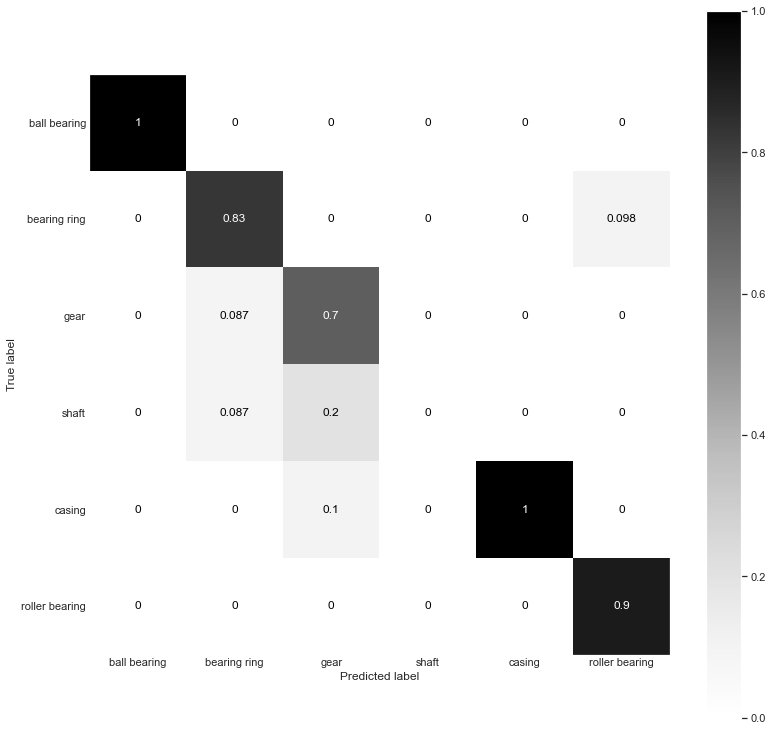

In [307]:
# Plot confusion matrix
confusionmatrix(df_7_clusters)

In [308]:
#Calculate accuracy score
accuracyscore(df_7_clusters)

92.02%


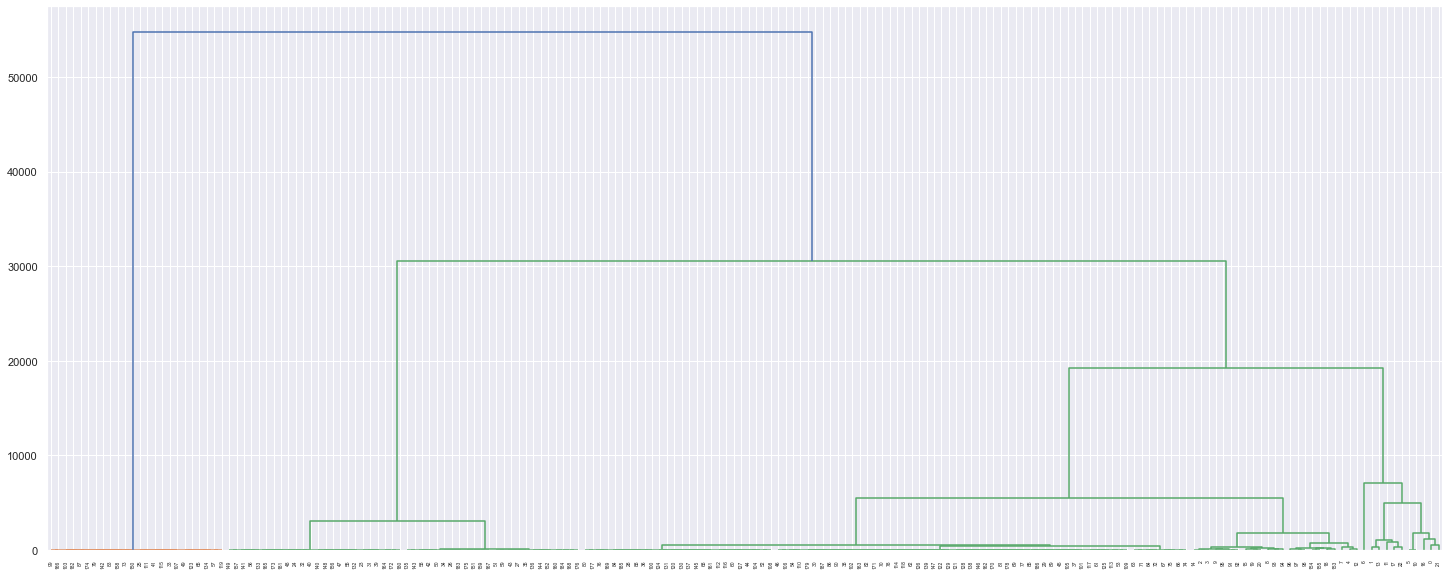

In [309]:
# Hierarchical clustering for 6 clusters

# create dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram_6_clusters = sch.dendrogram(sch.linkage(features, method='ward'))
plt.show()

# create clusters
hc_6_clusters = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
saved_hc_6_clusters = hc_6_clusters.fit_predict(features)


In [310]:
# Clustering outcomes for parts
outcome_6_clusters = saved_hc_6_clusters
outcome_6_clusters

array([0, 0, 1, 1, 1, 0, 4, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 2, 2, 3, 2, 2, 5, 5, 5, 2, 2, 3, 2, 2, 5, 5, 5, 2, 2, 3, 2, 2,
       5, 5, 5, 2, 2, 3, 2, 2, 5, 5, 5, 2, 2, 3, 2, 2, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3,
       5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5,
       5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 2, 3, 2, 2, 5, 5, 5, 2, 2, 3, 2, 2, 5, 5, 5, 2, 2, 3, 2, 2, 1,
       1, 1, 2, 2, 3, 2, 2, 5, 5, 5, 2, 2, 3, 2, 2, 5, 5, 5, 2, 2, 3, 2,
       2, 5, 5, 5, 2, 2, 3, 2, 2, 5, 5, 5])

In [311]:
# Plotting clustering outcomes
data_with_6_clusters = df.copy()
data_with_6_clusters['Clusters'] = outcome_6_clusters

In [312]:
# Making new dataframe to visualise clustering results
df_6_clusters = (pd.DataFrame(data_with_6_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [313]:
print(df_6_clusters['class'].unique())

['casing' 'gear' 'shaft' 'bearing ring' 'ball bearing' 'roller bearing']


In [314]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_6_clusters)

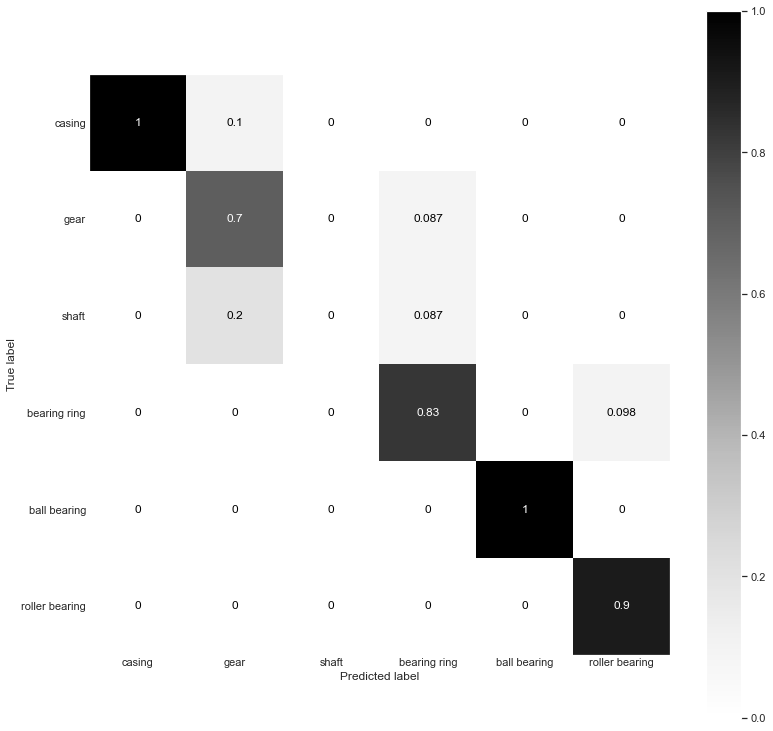

In [315]:
# Plot confusion matrix
confusionmatrix(df_6_clusters)

In [316]:
#Calculate accuracy score
accuracyscore(df_6_clusters)

92.02%


In [317]:
# Hierarchical clustering for 2 clusters

# create clusters
hc_2_clusters = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
saved_hc_2_clusters = hc_2_clusters.fit_predict(features)

In [318]:
# Clustering outcomes for parts (2 clusters)
outcome_2_clusters = saved_hc_2_clusters
outcome_2_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [319]:
# Plotting clustering outcomes (2 clusters)
data_with_2_clusters = df.copy()
data_with_2_clusters['Clusters'] = outcome_2_clusters

In [320]:
# Making new dataframe to visualise clustering results
df_2_clusters = (pd.DataFrame(data_with_2_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [321]:
""" 
Now testing model without casing and bearing rings to try to improve accuracy
From this point forth 
wcabr = without casing and bearing rings
"""

' \nNow testing model without casing and bearing rings to try to improve accuracy\nFrom this point forth \nwcabr = without casing and bearing rings\n'

In [322]:
# Removing Casing and Bearing Rings

df1=df.copy()
casing = df1[df1['class'] == 'casing'].index
df1.drop(casing, inplace = True)

bearing_ring = df1[df1['class'] == 'bearing ring'].index
df1.drop(bearing_ring, inplace = True)

In [323]:
# Allowing alternating between datasets
if len(df.columns)>35:
    parameters_wcabr = (df.columns.values[3:236])
else:
    parameters_wcabr = (df.columns.values[1:33])

In [324]:
# New variables
class_names_wcabr = df1['class'].unique()
class_wcabr = df1['class']
features_names_wcabr = parameters_wcabr
features_wcabr = df1[parameters_wcabr]

In [325]:
# Checking casing and bearing rings have been removed
print(class_names_wcabr)

['shaft' 'gear' 'ball bearing' 'roller bearing']


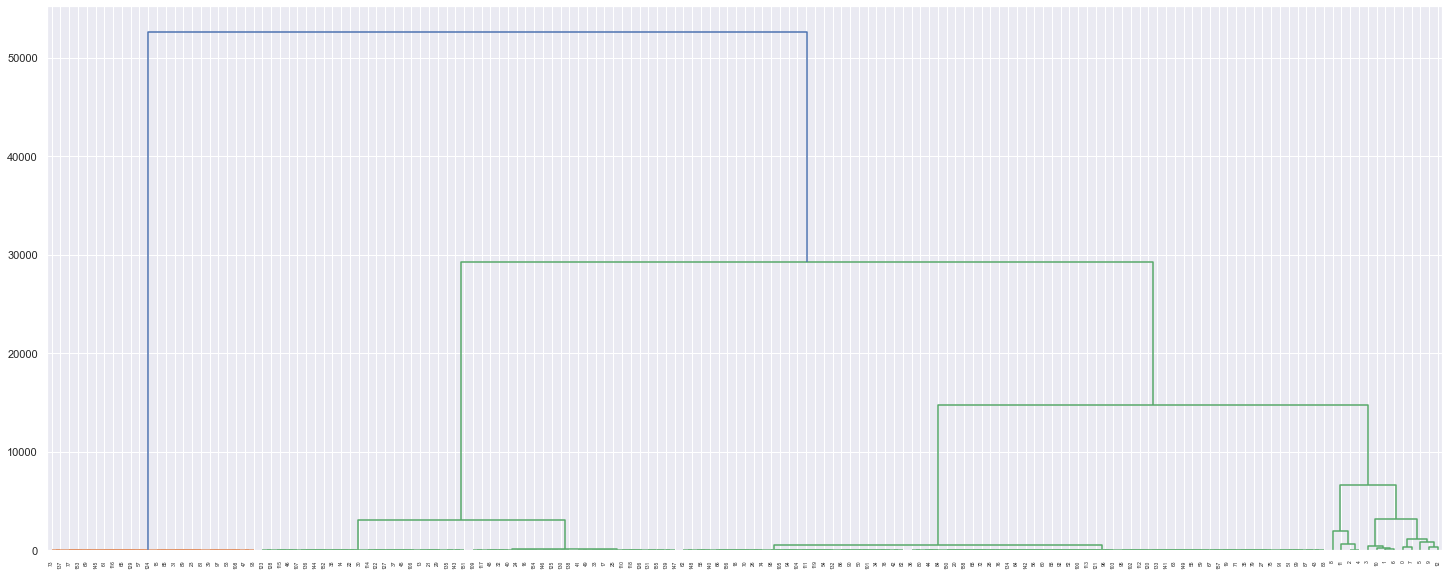

In [326]:
# Hierarchical clustering for 5 clusters wcabr

# create dendrogram

fig = plt.figure(figsize=(25, 10))
dendrogram_wcabr = sch.dendrogram(sch.linkage(features_wcabr, method='ward'))
plt.show()

# create clusters
hc_5_clusters_wcabr = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
saved_hc_5_clusters_wcabr = hc_5_clusters_wcabr.fit_predict(features_wcabr)


In [327]:
# Clustering outcomes for parts (5 clusters) wcabr
outcome_5_clusters_wcabr = saved_hc_5_clusters_wcabr
outcome_5_clusters_wcabr

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 3, 2, 2, 4, 4, 4, 2,
       2, 3, 2, 2, 4, 4, 4, 2, 2, 3, 2, 2, 4, 4, 4, 2, 2, 3, 2, 2, 4, 4,
       4, 2, 2, 3, 2, 2, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 2,
       2, 4, 4, 4, 2, 2, 3, 2, 2, 4, 4, 4, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       4, 4, 4, 2, 2, 3, 2, 2, 4, 4, 4, 2, 2, 3, 2, 2, 4, 4, 4, 2, 2, 3,
       2, 2, 4, 4, 4])

In [328]:
# Plotting clustering outcomes (5 clusters) wcabr
data_with_5_clusters_wcabr = df1.copy()
data_with_5_clusters_wcabr['Clusters'] = outcome_5_clusters_wcabr

In [329]:
# Making new dataframe to visualise clustering results
df_5_clusters_wcabr= (pd.DataFrame(data_with_5_clusters_wcabr, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [330]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_5_clusters_wcabr)

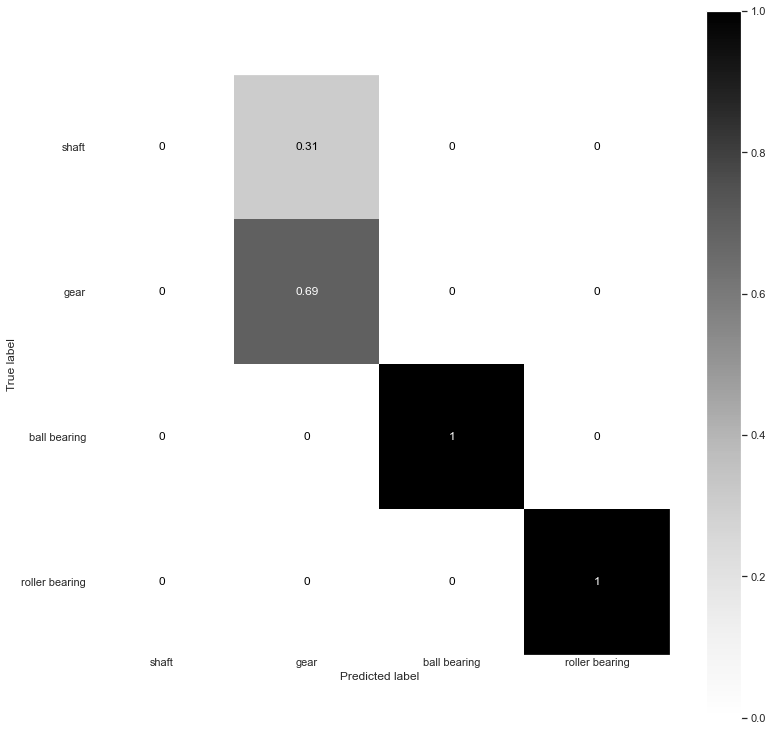

In [331]:
# Plot confusion matrix
confusionmatrix(df_5_clusters_wcabr)

In [332]:
#Calculate accuracy score
accuracyscore(df_5_clusters_wcabr)

97.48%


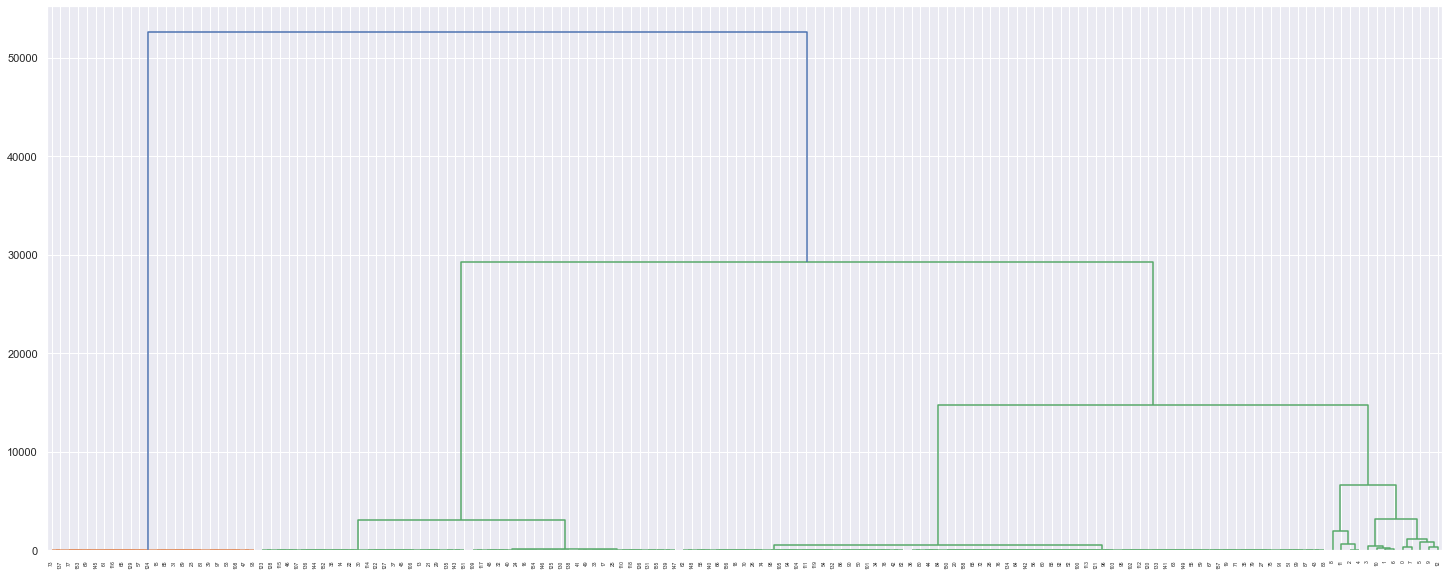

In [333]:
# Hierarchical clustering for 4 clusters wcabr

# create dendrogram

fig = plt.figure(figsize=(25, 10))
dendrogram_wcabr = sch.dendrogram(sch.linkage(features_wcabr, method='ward'))
plt.show()

# create clusters
hc_4_clusters_wcabr = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
saved_hc_4_clusters_wcabr = hc_4_clusters_wcabr.fit_predict(features_wcabr)


In [334]:
# Clustering outcomes for parts (4 clusters) wcabr
outcome_4_clusters_wcabr = saved_hc_4_clusters_wcabr
outcome_4_clusters_wcabr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 1, 1, 1, 2,
       2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1,
       1, 2, 2, 3, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2,
       2, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3,
       2, 2, 1, 1, 1])

In [335]:
# Plotting clustering outcomes (4 clusters) wcabr
data_with_4_clusters_wcabr = df1.copy()
data_with_4_clusters_wcabr['Clusters'] = outcome_4_clusters_wcabr


In [336]:
# Making new dataframe to visualise clustering results
df_4_clusters_wcabr= (pd.DataFrame(data_with_4_clusters_wcabr, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [337]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_4_clusters_wcabr)

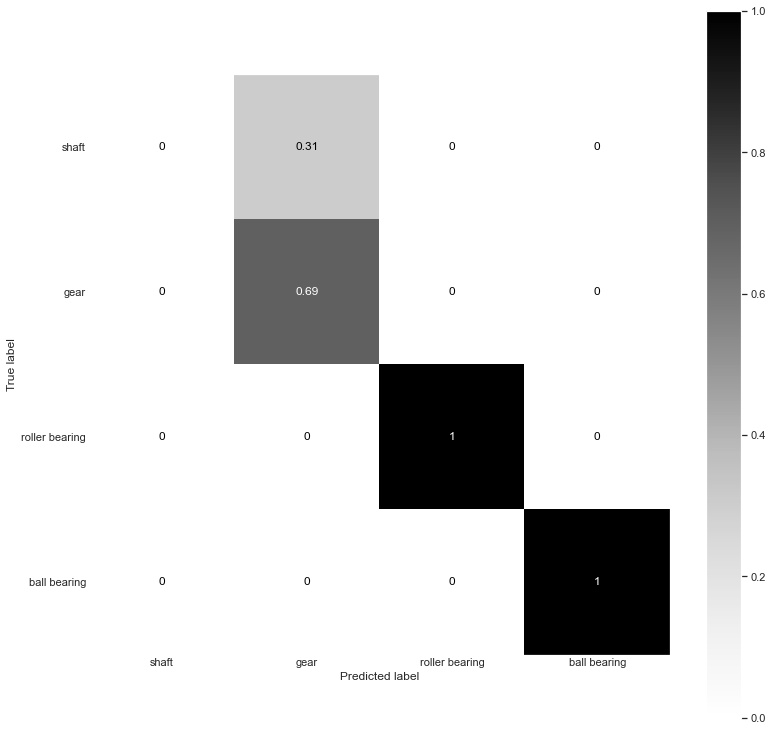

In [338]:
# Plot confusion matrix
confusionmatrix(df_4_clusters_wcabr)

In [339]:
#Calculate accuracy score
accuracyscore(df_4_clusters_wcabr)

97.48%


In [340]:
# Hierarchical clustering for 3 clusters wcabr

# create clusters
hc_3_clusters_wcabr = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
saved_hc_3_clusters_wcabr = hc_3_clusters_wcabr.fit_predict(features_wcabr)


In [341]:
# Clustering outcomes for parts (3 clusters) wcabr
outcome_3_clusters_wcabr = saved_hc_3_clusters_wcabr
outcome_3_clusters_wcabr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2,
       2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1,
       2, 2, 0, 0, 0])

In [342]:
# Plotting clustering outcomes (3 clusters) wcabr
data_with_3_clusters_wcabr = df1.copy()
data_with_3_clusters_wcabr['Clusters'] = outcome_3_clusters_wcabr

In [343]:
# Making new dataframe to visualise clustering results
df_3_clusters_wcabr= (pd.DataFrame(data_with_3_clusters_wcabr, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [344]:
# Hierarchical clustering for 2 clusters wcabr

# create clusters
hc_2_clusters_wcabr = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
saved_hc_2_clusters_wcabr = hc_2_clusters_wcabr.fit_predict(features_wcabr)


In [345]:
# Clustering outcomes for parts (2 clusters) wcabr
outcome_2_clusters_wcabr = saved_hc_2_clusters_wcabr
outcome_2_clusters_wcabr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [346]:
# Plotting clustering outcomes (2 clusters) wcabr
data_with_2_clusters_wcabr = df1.copy()
data_with_2_clusters_wcabr['Clusters'] = outcome_2_clusters_wcabr

In [347]:
## Making new dataframe to visualise clustering results
df_2_clusters_wcabr= (pd.DataFrame(data_with_2_clusters_wcabr, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [348]:
# Allowing alternating between datasets
if dataset == path1:
    out = 'models/1_old_gearbox_H_cluster.xlsx'
elif dataset == path2:
    out = 'models/2_old_gearbox_H_cluster_all_variables.xlsx' 
elif dataset == path3:
    out = 'models/3_new_gearbox_H_cluster.xlsx'
elif dataset == path4:
    out = 'models/4_new_gearbox_H_cluster_all_variables.xlsx'
else:
    out = 'models/5_both_gearboxes_H_cluster_all_variables.xlsx'

In [349]:
with pd.ExcelWriter(out) as writer:  
    df_2_clusters.to_excel(writer, sheet_name='2 clusters', index = False)
    df_6_clusters.to_excel(writer, sheet_name='6 clusters', index = False)
    df_7_clusters.to_excel(writer, sheet_name='7 clusters', index = False)
    df_2_clusters_wcabr.to_excel(writer, sheet_name='2 clusters WCABR', index = False)
    df_3_clusters_wcabr.to_excel(writer, sheet_name='3 clusters WCABR', index = False)
    df_4_clusters_wcabr.to_excel(writer, sheet_name='4 clusters WCABR', index = False)
    df_5_clusters_wcabr.to_excel(writer, sheet_name='5 clusters WCABR', index = False)

IndentationError: unexpected indent (<ipython-input-349-34c3789c6641>, line 2)